# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Support Vector Machines - Classification)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to know about the updates, please don't forget to follow us. </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

# <font color='green'> <b>EDA</b><font color='black'>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix, PrecisionRecallDisplay, average_precision_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

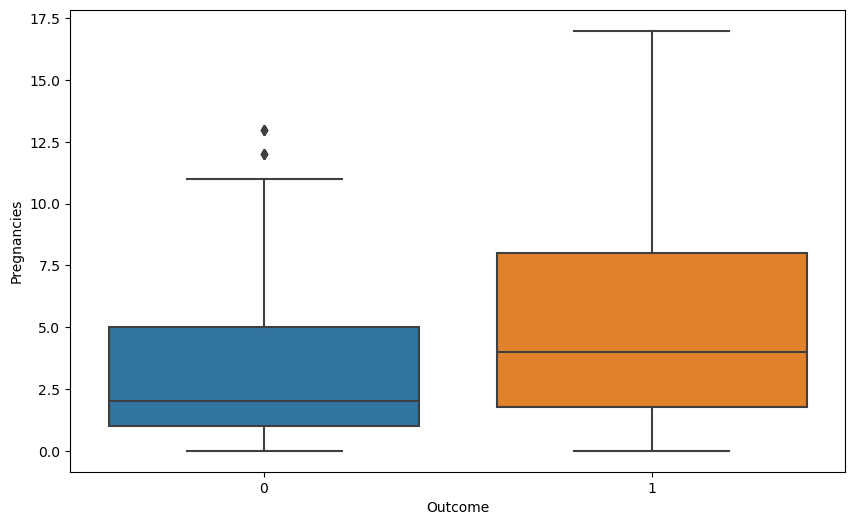

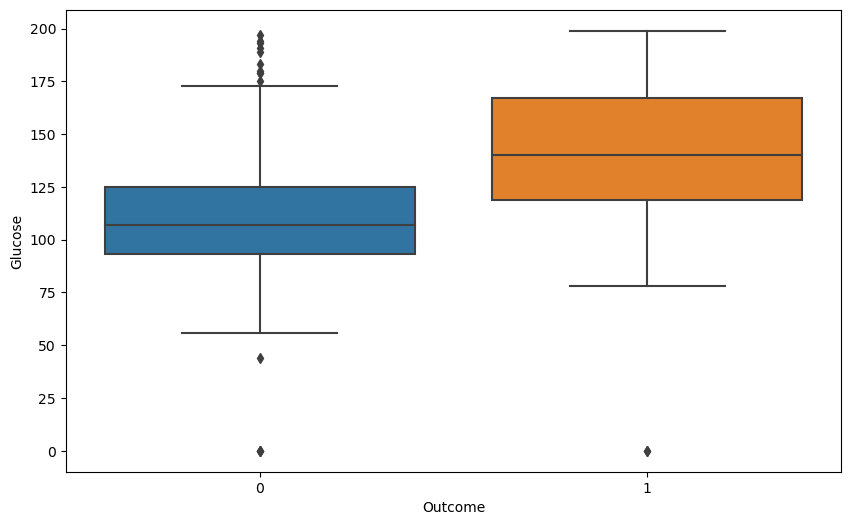

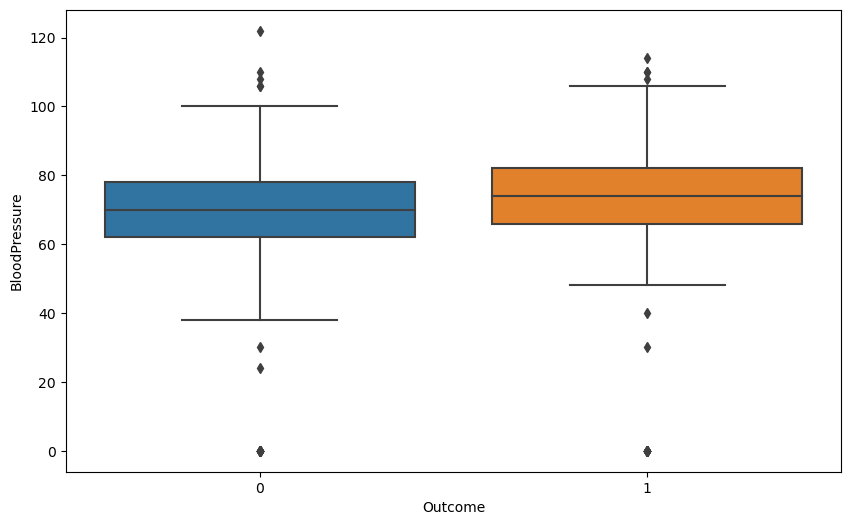

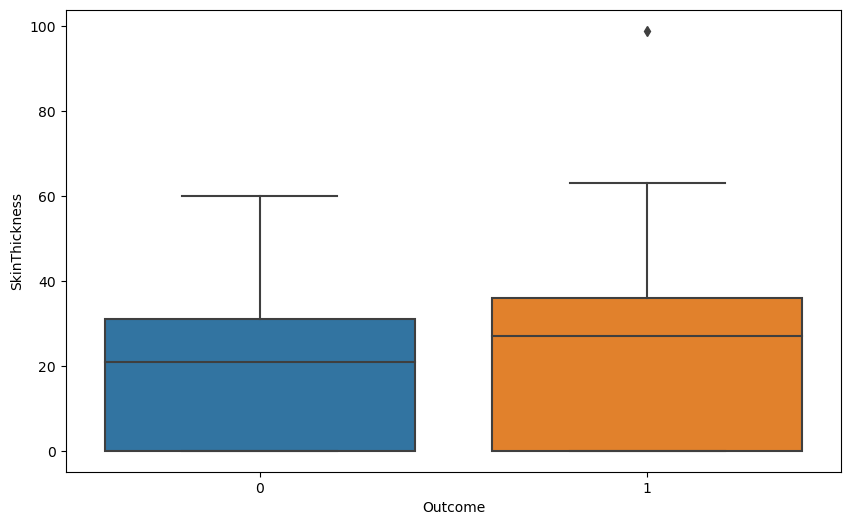

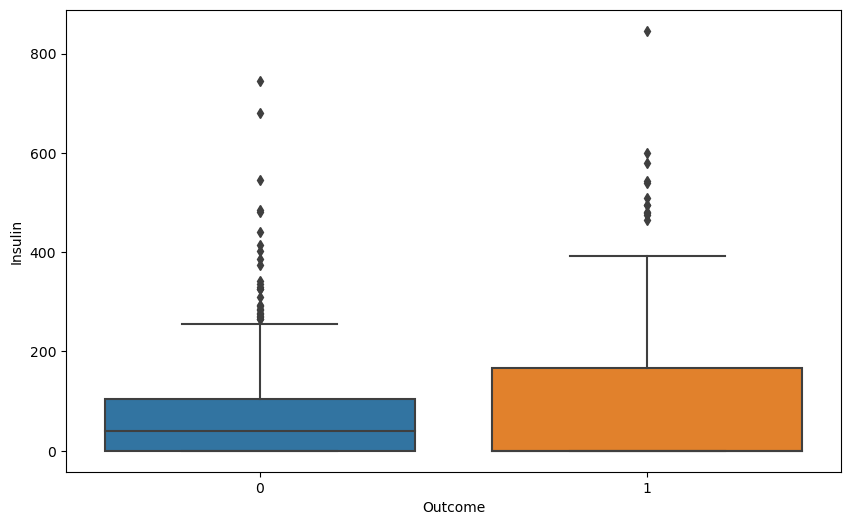

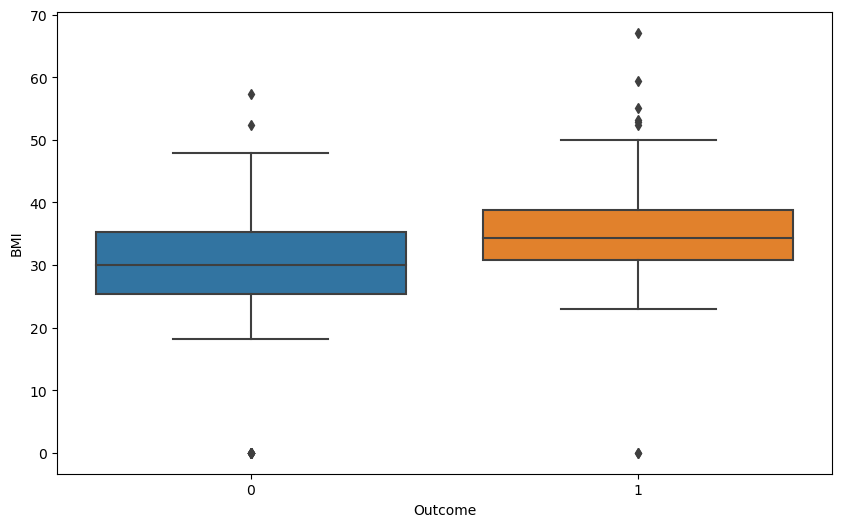

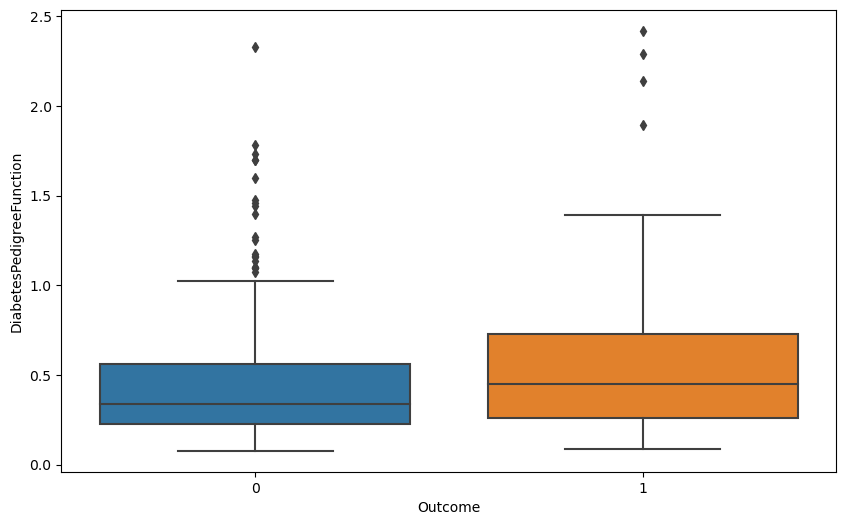

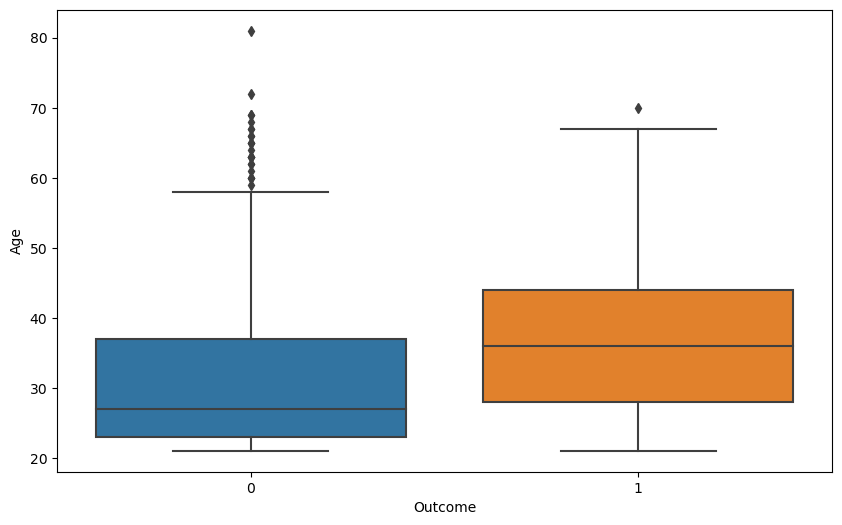

In [7]:
features = df.drop("Outcome", axis=1).columns

for i, feature in enumerate(features, 1):
    sns.boxplot(x="Outcome", y=feature, data=df)
    plt.show()

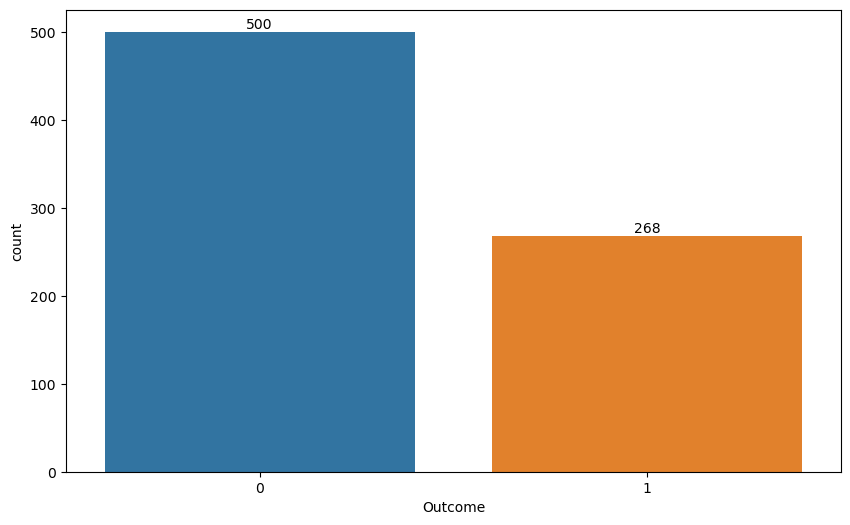

In [8]:
ax = sns.countplot(x=df.Outcome, data=df)
ax.bar_label(ax.containers[0]);

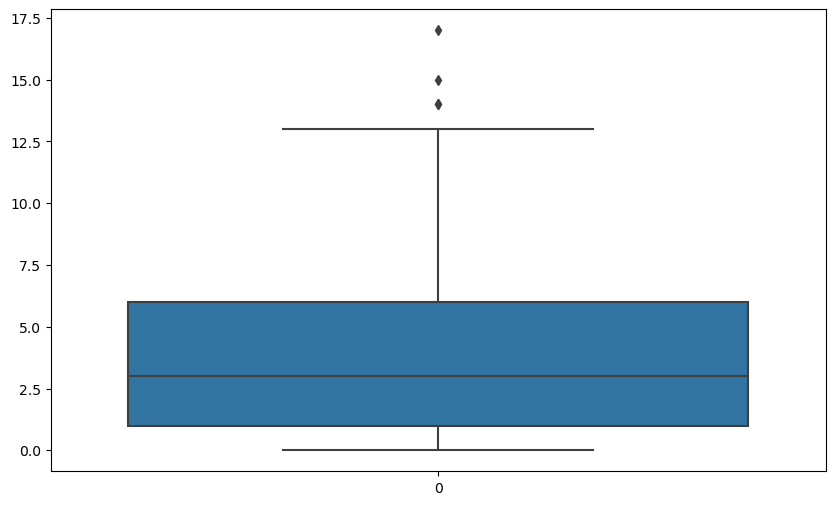

In [9]:
sns.boxplot(df.Pregnancies);

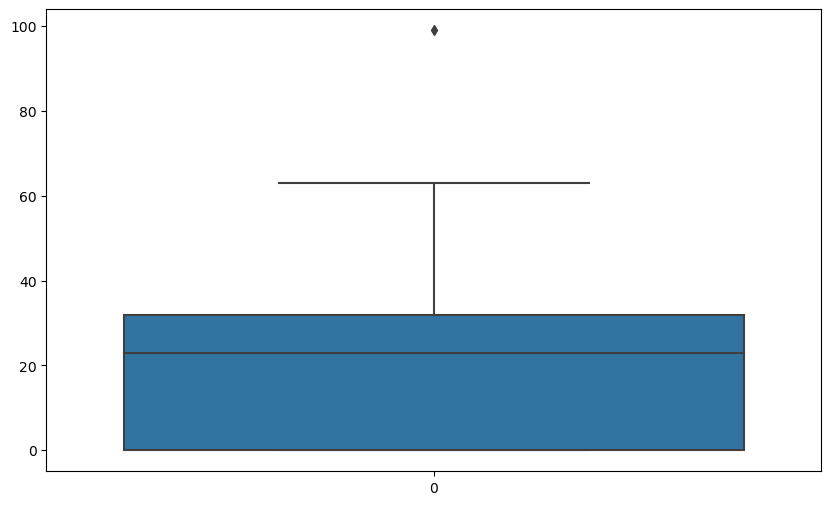

In [10]:
sns.boxplot(df.SkinThickness);

In [11]:
df=df[df.SkinThickness<70]

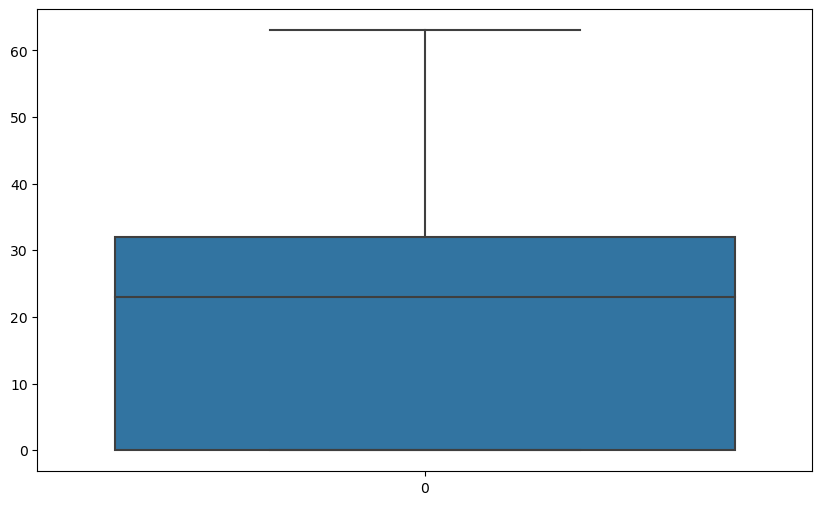

In [12]:
sns.boxplot(df.SkinThickness);

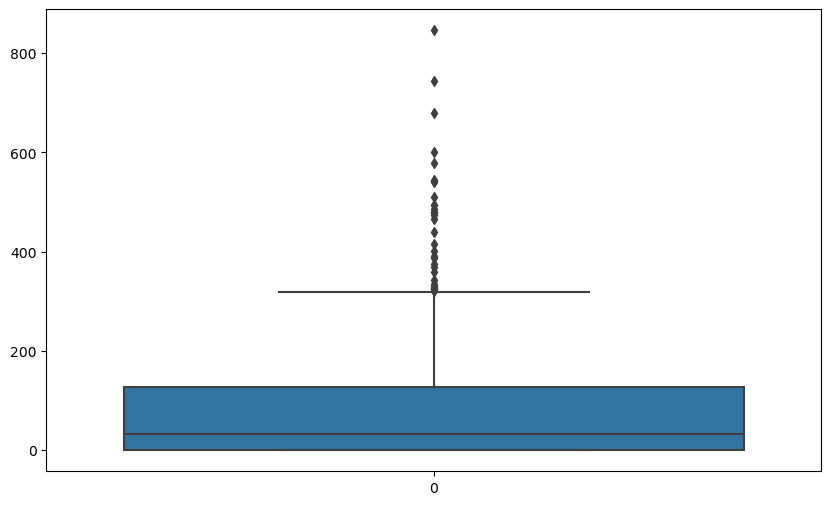

In [13]:
sns.boxplot(df.Insulin);

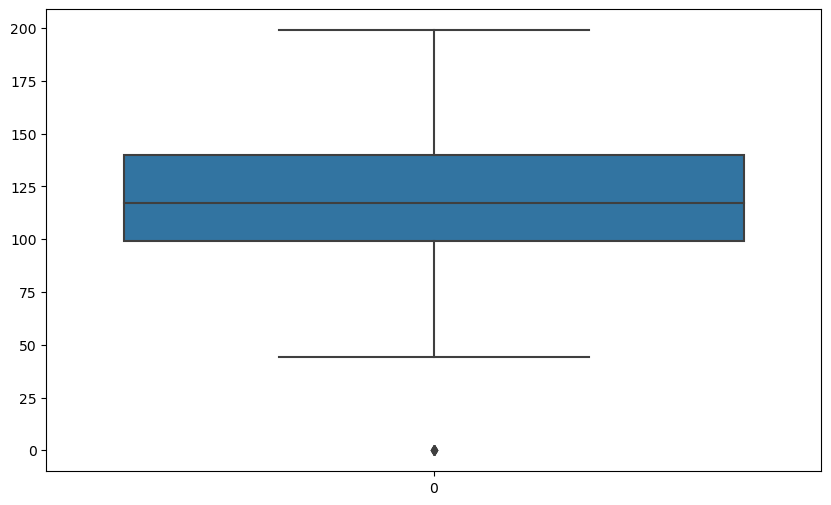

In [14]:
sns.boxplot(df.Glucose);

In [15]:
df=df[df.Glucose>0]

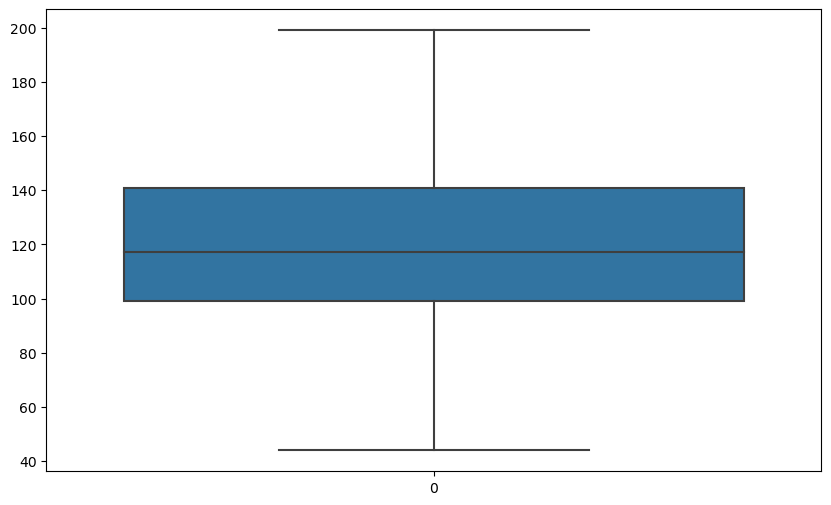

In [16]:
sns.boxplot(df.Glucose);

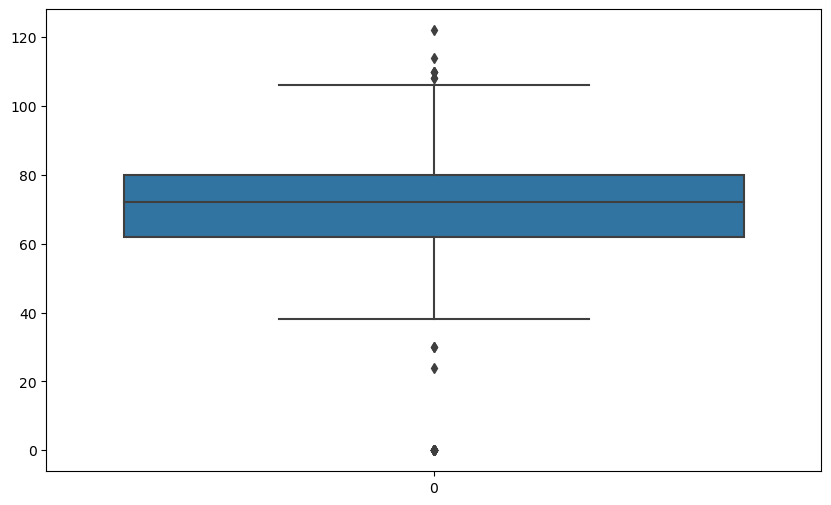

In [17]:
sns.boxplot(df.BloodPressure);

In [18]:
df=df[df.BloodPressure>35]

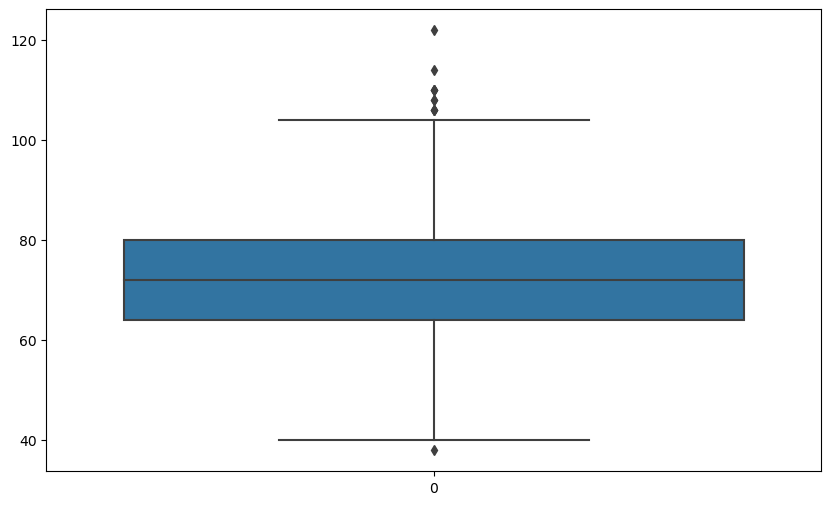

In [19]:
sns.boxplot(df.BloodPressure);

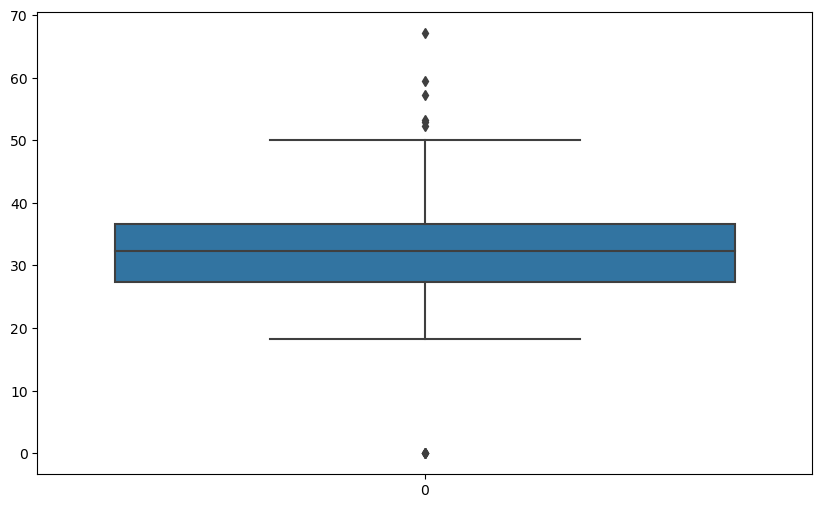

In [20]:
sns.boxplot(df.BMI);

In [21]:
df=df[df.BMI>0]

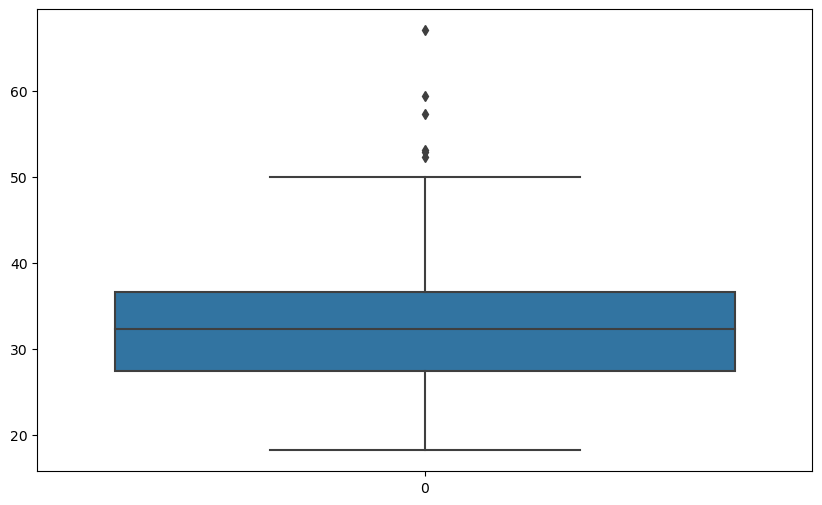

In [22]:
sns.boxplot(df.BMI);

In [23]:
df.shape

(720, 9)

In [24]:
df.Outcome.value_counts()

Outcome
0    473
1    247
Name: count, dtype: int64

In [25]:
df.Outcome.value_counts(normalize=True)

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64

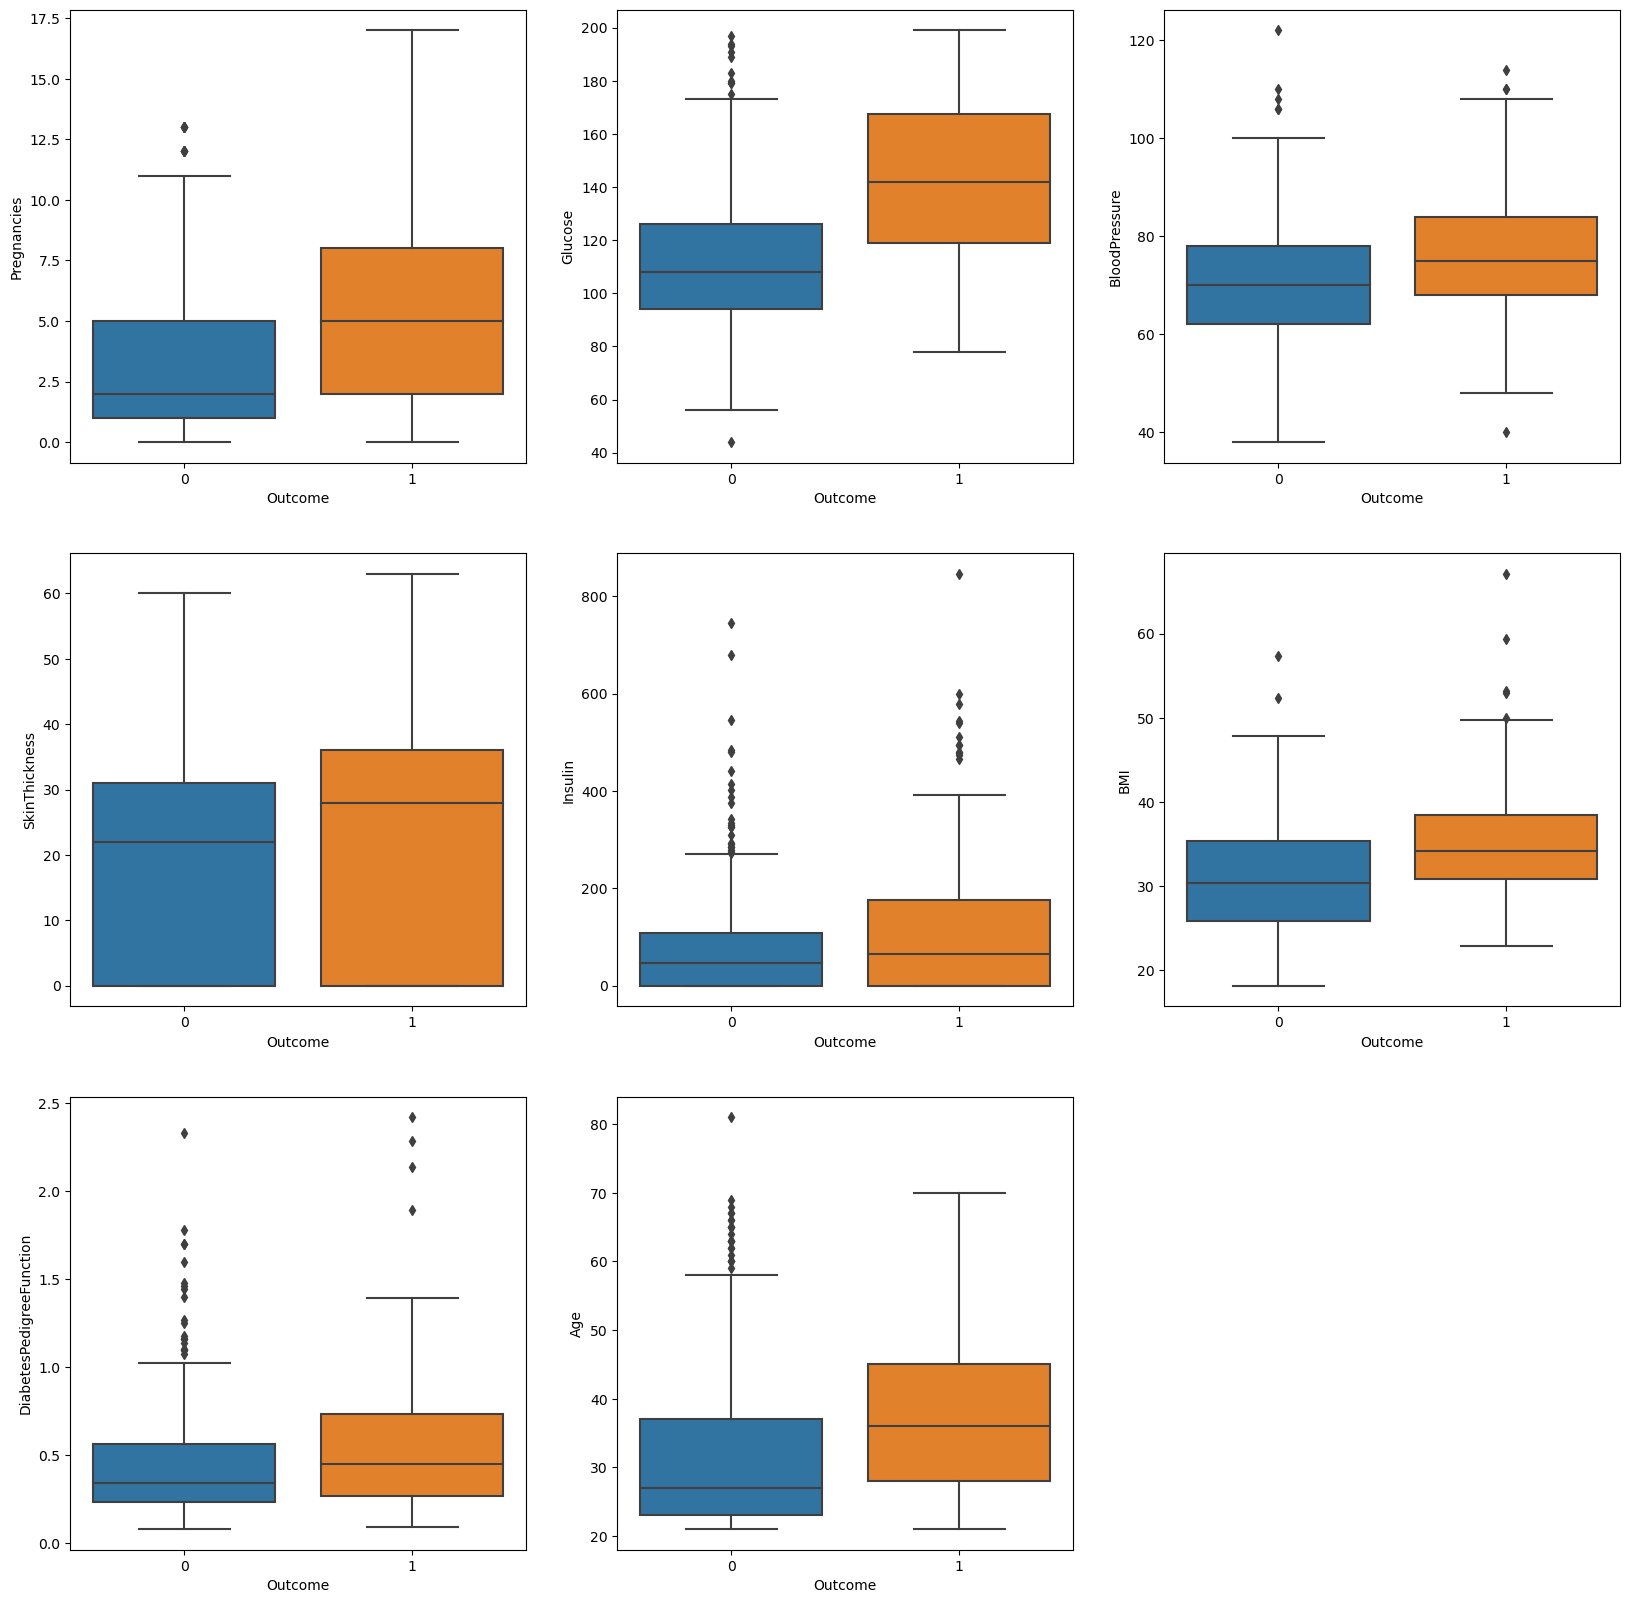

In [26]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)

In [27]:
import plotly.express as px
plt.figure(figsize=(10,8))

fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

# plt.figure(figsize=(10,8))
# sns.heatmap(df.corr(), annot=True);

<Figure size 1000x800 with 0 Axes>

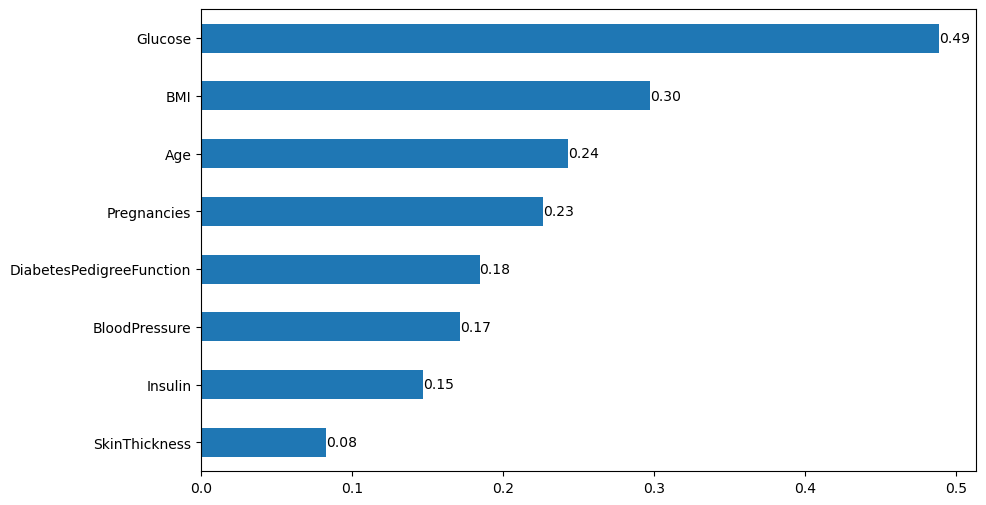

In [28]:
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt="%.2f");

In [29]:
sns.pairplot(df, hue = "Outcome");

Error in callback <function flush_figures at 0x71ba6ec86e80> (for post_execute):


KeyboardInterrupt: 

# <font color='green'> <b>Modelling and Model Performance</b><font color='black'>

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [30]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [32]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## <font color='blue'> <b>Without Scaling</b><font color='black'>

In [33]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
eval_metric(svm_model, X_train, y_train, X_test, y_test)

# Since SVM is a distance-based model, the data needs to be scaled. 
# However, to see how the results change, we will proceed without scaling first.

Test_Set
[[90  5]
 [24 25]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        95
           1       0.83      0.51      0.63        49

    accuracy                           0.80       144
   macro avg       0.81      0.73      0.75       144
weighted avg       0.80      0.80      0.78       144


Train_Set
[[347  31]
 [110  88]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       378
           1       0.74      0.44      0.56       198

    accuracy                           0.76       576
   macro avg       0.75      0.68      0.69       576
weighted avg       0.75      0.76      0.74       576



In [34]:
model = SVC()

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))

df_scores.mean()[2:]

test_accuracy      0.737871
train_accuracy     0.756558
test_precision     0.708153
train_precision    0.736046
test_recall        0.420000
train_recall       0.455097
test_f1            0.520214
train_f1           0.562177
dtype: float64

In [35]:
X_train.shape

(576, 8)

In [36]:
X_test.shape

(144, 8)

## <font color='blue'> <b>With Scaling</b><font color='black'>

In [37]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

# Now let's check the results with scale.

In [38]:
pipe_model.fit(X_train, y_train)

eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[347  31]
 [ 74 124]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       378
           1       0.80      0.63      0.70       198

    accuracy                           0.82       576
   macro avg       0.81      0.77      0.79       576
weighted avg       0.82      0.82      0.81       576



In [39]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

# We check for overfitting.

test_accuracy      0.751785
train_accuracy     0.830634
test_precision     0.672696
train_precision    0.824515
test_recall        0.535789
train_recall       0.644231
test_f1            0.593820
train_f1           0.723120
dtype: float64

## <font color='blue'> <b>With Best Parameters (GridsearchCV)</b><font color='black'>

In [40]:
pipe_model.get_params() # The answer to how we should provide it in the param grid.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC())],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': None,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [41]:
param_grid = {'SVC__C': [0.001, 0.05, 0.01, 0.1, 0.5],
              'SVC__gamma': ["scale", "auto", 0.2, 0.3, 0.5],
              'SVC__kernel': ['rbf', 'linear'],
              'SVC__class_weight': ["balanced", None]}

# We are defining our hyperparameter space..

In [42]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]

pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model,
                              param_grid,
                              scoring="recall",
                              cv=5,
                              return_train_score=True,
                              n_jobs=1).fit(X_train, y_train)

# SVC does not make predictions using `predict_proba`.
# Predictions are made using the `decision_function`.
# If we want to obtain `predict_proba`, we need to set the probability hyperparameter of SVC to True.

In [43]:
svm_model_grid.best_params_

{'SVC__C': 0.1,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 0.5,
 'SVC__kernel': 'rbf'}

In [44]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=0.1, class_weight='balanced', gamma=0.5,
                     probability=True))])

In [45]:
svm_model_grid.best_index_

68

In [46]:
pd.DataFrame(svm_model_grid.cv_results_).loc[68, ["mean_test_score", "mean_train_score"]]

# Check for overfiting.

mean_test_score     0.919487
mean_train_score    0.953276
Name: 68, dtype: object

In [47]:
svm_model_grid.best_score_

0.9194871794871796

In [48]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[39 56]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.95      0.41      0.57        95
           1       0.46      0.96      0.62        49

    accuracy                           0.60       144
   macro avg       0.70      0.68      0.60       144
weighted avg       0.78      0.60      0.59       144


Train_Set
[[174 204]
 [ 10 188]]
              precision    recall  f1-score   support

           0       0.95      0.46      0.62       378
           1       0.48      0.95      0.64       198

    accuracy                           0.63       576
   macro avg       0.71      0.70      0.63       576
weighted avg       0.79      0.63      0.63       576



In [49]:
decision_function = svm_model_grid.decision_function(X_test)
decision_function

# SVC performs the prediction operation through the `decision_function`.
# Positive values indicate class 1, while negative values indicate class 0.
# The larger the absolute value, the farther the observation is from the hyperplane.

array([ 0.63906031,  0.79176295,  0.73519068, -0.20225419,  0.73316814,
       -0.57631943,  0.14825358,  0.85812815, -1.04880001,  0.1844397 ,
        0.26680333,  0.47775977,  0.11396222, -0.4017274 ,  0.89937631,
        0.6278782 , -1.08504776,  0.95010194,  0.70130479, -1.20395382,
        0.74770131, -0.07649685,  0.98603743,  0.26873278, -0.11500394,
        0.59273926, -0.52231513,  0.47599842, -0.05154567, -0.24826285,
        0.62556277,  0.50165338,  0.61702153,  0.16478031,  0.63058378,
       -0.09905568,  0.7150412 ,  0.49701597,  0.65528673,  0.41153283,
        0.49320867, -0.98788463, -0.77986735,  0.85614723,  0.63227463,
        0.22172904,  0.59437648,  0.65216303,  0.96705383,  0.48881574,
        0.62548838, -0.76023745,  0.13982543, -0.44174264, -0.71059951,
        0.94776704,  0.63522658, -1.36076657,  0.72029338,  0.94844814,
        0.73322563,  0.65687659,  0.87010536,  0.96131497,  1.01536471,
       -0.9035248 ,  0.66032752,  0.13228042,  0.67700769, -0.61

In [50]:
predict_proba = svm_model_grid.predict_proba(X_test)[:,1]
predict_proba

# According to `predict_proba`, values above 0.5 should be assigned to class 1, and values below 0.5 should be 
# assigned to class 0.
# However, observations 26 and 28, with values of 0.47124411 and 0.39960741 respectively, have been assigned 
# to class 1.
# Therefore, since `predict_proba` does not work correctly in SVC, we do not use `predict_proba`.

array([0.5       , 0.58050613, 0.54987765, 0.13649286, 0.54878093,
       0.06533755, 0.25346305, 0.61649233, 0.02486968, 0.26868582,
       0.30541258, 0.41098055, 0.2395732 , 0.09280903, 0.63904467,
       0.49147548, 0.02298882, 0.66121467, 0.53147955, 0.01775489,
       0.55665796, 0.17215423, 0.67854477, 0.30630606, 0.16051177,
       0.47234658, 0.07290981, 0.41006613, 0.18004917, 0.1250907 ,
       0.49021337, 0.42348075, 0.485559  , 0.26034424, 0.49295041,
       0.16525454, 0.53894382, 0.42104132, 0.5064197 , 0.37736795,
       0.41904318, 0.02837897, 0.04443705, 0.61541406, 0.49387223,
       0.28496452, 0.47323615, 0.5       , 0.66944729, 0.41674305,
       0.49017282, 0.04634529, 0.25000044, 0.08571709, 0.05152921,
       0.66007291, 0.5       , 0.01262117, 0.54179556, 0.66040616,
       0.54881211, 0.50728647, 0.62302023, 0.66667152, 0.69233519,
       0.03405663, 0.50916773, 0.24692753, 0.51825692, 0.0607036 ,
       0.47346734, 0.4035076 , 0.54643577, 0.38478309, 0.56253

In [51]:
svm_model_grid.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

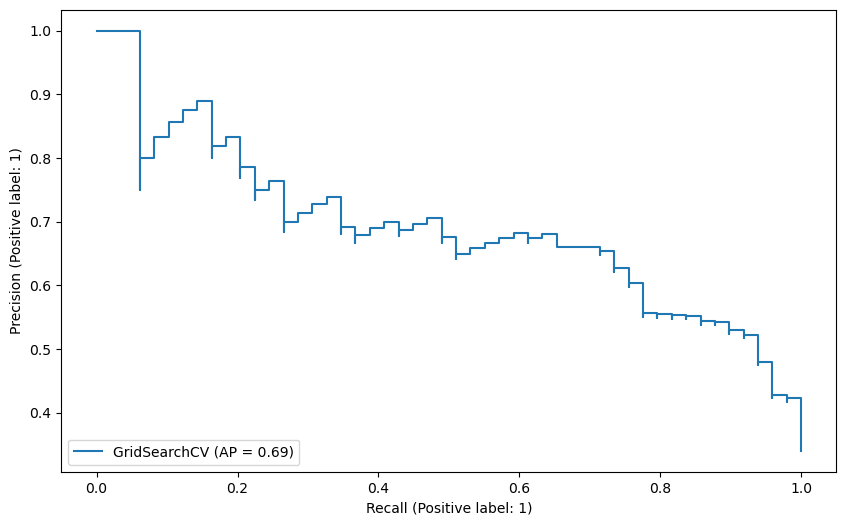

In [52]:
PrecisionRecallDisplay.from_estimator(svm_model_grid, X_test, y_test);

# With the SVC model, we can obtain average precision or AUC values through the `decision_function`.

In [53]:
average_precision_score(y_test, decision_function)

# We prefer the decision function for the average precision score.
# Because we know that `predict_proba` does not work properly.

0.6916071833158592

## <font color='blue'> <b>Comparing SVM and Logistic Regression Scores</b><font color='black'>

# <p style="background-color:green;font-family:newtimeroman;font-size:150%;color:white;text-align:center;border-radius:20px 20px;"><b>Thank you with the hope that it will be helpful.</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>If you want to be the first to know about the updates, please don't forget to follow us. </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/)